<p align="center">
  <img src="https://i.ytimg.com/vi/Wm8ftqDZUVk/maxresdefault.jpg" alt="FIUBA" width="33%"/>
  </p>
  
# **Trabajo Práctico 1: Reservas de Hotel**
### **Checkpoint**: 1
### **Grupo**: 11 - Los Pandas
### **Cuatrimestre**: 2ºC 2023
### **Corrector**: Mateo
### **Integrantes**:
### 103456 - Labollita, Francisco
### 102312 - Mundani Vegega, Ezequiel
###  97263 - Otegui, Matías Iñaki

# Introducción

En el siguiente trabajo práctico, se propone abordar un problema real de ciencia de datos, investigar cada una de las etapas del proceso y resolverlo aplicando los contenidos desarrollados en clase.  
También, a partir de un conjunto de datos de reservas de hotel, proveídos por la cátedra, aplicar técnicas de análisis exploratorio, preprocesamiento de datos y entrenar un modelo de clasificación con el objetivo de predecir si una reserva será o no cancelada.

# Análisis Exploratorio y Preprocesamiento de Datos

## Exploración Inicial

### Carga inicial de dependencias y datos

En primer lugar, se cargan las dependencias a utilizar

In [3]:
import numpy as np
import pandas as pd
from IPython.display import display
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

y se cargan los datos de reserva de hoteles en el siguiente dataframe:

In [6]:
hotels_train_url = 'hotels_train.csv'
hotels_df = pd.read_csv(hotels_train_url)

A continuación, se presentan las primeras 5 filas listadas con todas las respectivas columnas para tener una idea general de como se ven los datos para comenzar a analizarlos:

In [7]:
hotels_df.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0


Hay un total de 31 columnas. De todos estos parámetros, se tendrán en cuenta aquellos que sirvan, en nuestro criterio, sean de utilidad para entrenar el modelo predictivo.  
Se propone analizar cada parámetro individualmente y, al finalizar, presentar un pequeño resumen con las conclusiones de este análisis inicial.

### Parámetros

#### hotel

El parámetro es un _string_ que indica el nombre del Hotel. No aporta información útil para el entrenamiento del modelo propuesto en sí, si no que permite conocer de donde se obtuvieron dichos datos. Esto podría servir en el futuro para comparar con respecto a otros hoteles o el impacto de la ubicación del mismo con respecto a sus reservas.  

Se propone verificar la cantidad de valores únicos que aparecen en dicha columna:

In [19]:
# Valores únicos en la columna 'hotel'
hotel_unique = hotels_df['hotel'].unique()

# Cantidad de valores únicos en la columna 'hotel'
hotel_unique_cant = len(hotel_unique)

print("La cantidad de hoteles cargados en el .CSV es de: ", hotel_unique_cant)
print()
print("Estos hoteles son: ", hotel_unique)

La cantidad de hoteles cargados en el .CSV es de:  2

Estos hoteles son:  ['City Hotel' 'Resort Hotel']


Entonces, se sabe que los datos obtenidos pertenecen a dos hoteles de nombres: "City Hotel" y "Resort Hotel". Como se comentó antes, estos datos son **irrelevantes** para el modelo de entrenamiento, pero podrían resultar de utilidad en caso de querer saber el origen de la información, o su zona geográfica, y compararlo con respecto a otros hoteles.

Por otro lado, el parámetro es una **Variable Independiente Cualitativa de tipo Texto y es Nominal** ya que es una etiqueta con valores no relacionados entre sí. Es, simplemente, una forma de identificar el establecimiento.  
Se propone obtener la cantidad de veces que aparecen ambos hoteles en las celdas y su frecuencia:

In [20]:
# Cantidad de veces que aparecen los valores
hotel_counts = hotels_df['hotel'].value_counts()

# Porcentaje de veces que aparecen los valores
hotel_percentage = hotels_df['hotel'].value_counts(normalize=True)

# Cantidad de valores nulos en dicha columna
hotel_nulls = hotels_df['hotel'].isnull().sum()

print("La cantidad de veces que aparecen los hoteles son: ")
print(hotel_counts)
print()
print("Los porcentajes de aparición del nombre de los hoteles con respecto al total son: ")
print(hotel_percentage)
print()
print("La columna contiene un total de", hotel_nulls, "valores nulos ")

La cantidad de veces que aparecen los hoteles son: 
hotel
City Hotel      42129
Resort Hotel    19784
Name: count, dtype: int64

Los porcentajes de aparición del nombre de los hoteles con respecto al total son: 
hotel
City Hotel      0.680455
Resort Hotel    0.319545
Name: proportion, dtype: float64

La columna contiene un total de 0 valores nulos 


Se puede observar que la columna **no contiene valores nulos** y que la mayoría de los registros provienen del _City Hotel_, siendo un poco menos del 70% del total.

Se presentan, a modo de visualización, dos **gráficos** con la cantidad de veces que aparece cada nombre:

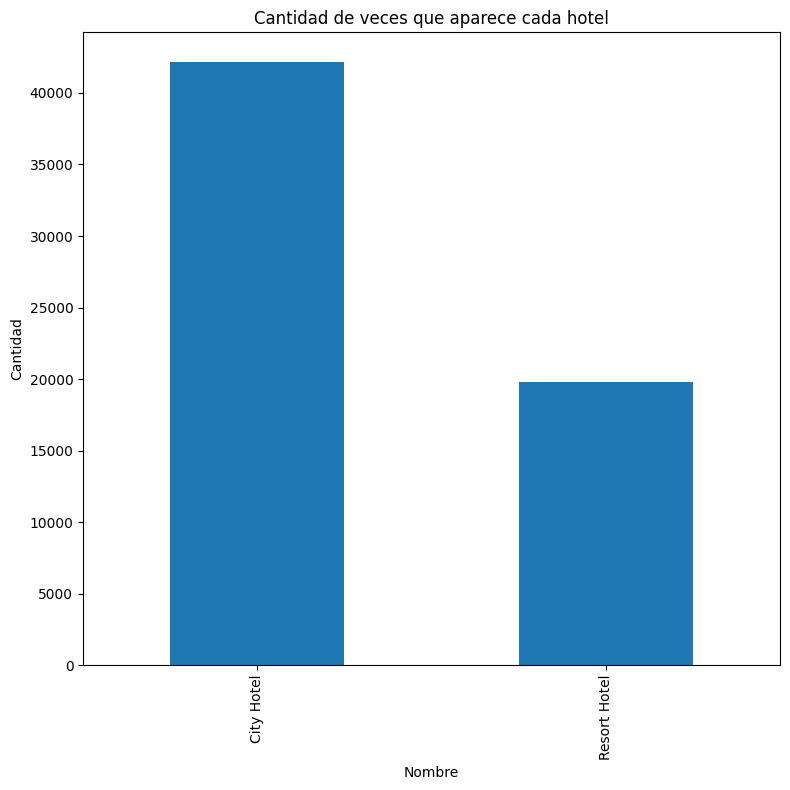

In [25]:
plt.figure(figsize=(8, 8))
hotel_counts.plot(kind='bar')
plt.xlabel('Nombre')
plt.ylabel('Cantidad')
plt.title('Cantidad de veces que aparece cada hotel')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

En forma de gráfico de torta:

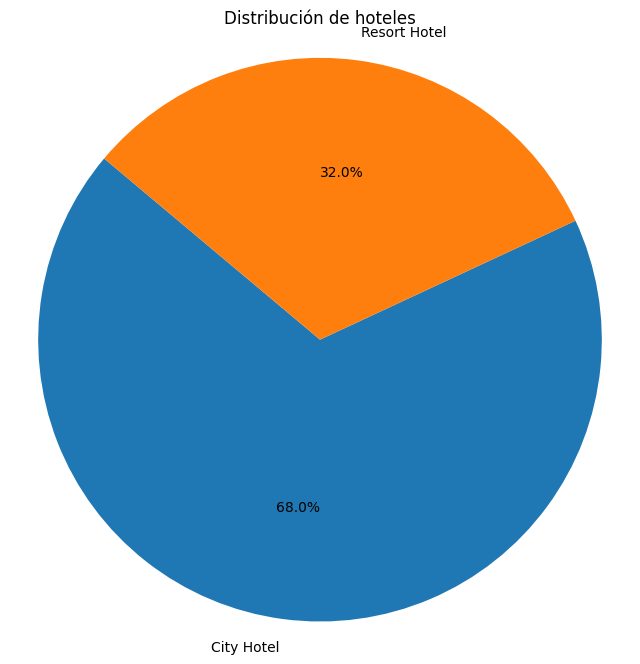

In [26]:
plt.figure(figsize=(8, 8))
plt.pie(hotel_counts, labels=hotel_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribución de hoteles')
plt.show()

En cuanto a su relación con el **target**, no se considera relevante para el entrenamiento del modelo. Tal vez, podría tenerse en cuenta para obtener reviews del hotel, o compararse con otros hoteles como se comentó antes; pero en cuanto al entrenamiento en sí para este caso, no se tendrá en cuenta.

## Visualización de los Datos

## Datos Faltantes

## Valores Atípicos

# Clasificación - Entrenamiento y Predicción